# Overfitting
- Au coeur de la compréhension de l'Overfitting, on retrouve le biais et de la variance. Le bais et la variance consistes les deux sources d'erreurs que nous pouvons contrôler indirectement.

 - **Le biais**: décrit l'erreur qui entraine de mauvaises hypothèses sur l'algorithme d'apprentissage.
 - **La variance:** d'écrit l'erreur due à la variabilitré des valeurs prédites d'un modèle.
 
 Pour savoir si le modele est overfiting ou non, il faut:
 
 **Comlparer l'erreur d'apprentissage et l'erreur test.**
 
  - si mse_test ou validation croisé test est > de l'erreur appenti il sagit de overfiting

## Introduction aux données

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
           'model year', 'origin', 'car name']

cars = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=columns)

# On va filtere la base en supprimant les ? et transformer les données en type float
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Fonction pour entrainer le modèle et calculer biais et variance

+ Créer une fonction nommée train_and_test qui:
 - Prend une liste de noms de colonnes de filtered_cars en seul paramètre (cols),
 - Entraine un modèle de régression linéaire en utilisant:
   - Les colonnes cols en tant que caractéristiques,
   - La colonne mpg en tant que colonne cible.
 - Utiliser le modèle entrainé pour faire des prédictions en utilisant les mêmes colonnes que pendant l'entrainement,
 - Calculer la variance des valeurs prédites et l'erreur quadratique moyenne entre les valeurs prédites et les valeurs réelles (colonne mpg).
 - Retourne la valeur d'erreur quadratique moyenne suivi de la variance (avec: return(mse, variance)).
+ Utiliser la fonction train_and_test pour entrainer un modèle en utilisant uniquement la colonne cylinders. Assigner l'erreur quadratique moyenne résultante et la variance aux variables cyl_mse et cyl_var.
+ Utiliser la fonction train_and_test pour entrainer un modèle utilisant uniquement la colonne weight. Assigner l'erreur quadratique moyenne et la variance aux variables weight_mse et weight_var.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_test(cols):
    # séparer en caractéristiques et colonne cible
    features = filtered_cars[cols]
    target = filtered_cars['mpg']
    
    # adapter le modèle à nos données d'entrainement avec la méthode fit
    lr = LinearRegression()
    lr.fit(features, target)
    
    # faire des prédictions sur le set de training
    predictions = lr.predict(features)
    
    # calculer MSE et la variance
    mse = mean_squared_error(filtered_cars['mpg'], predictions)
    variance = np.var(predictions)
    return(mse, variance)

# On va tester notre modele sur la colonne cyl_mse et cyl_var
cyl_mse, cyl_var = train_and_test(['cylinders'])
weight_mse, weight_var = train_and_test(['weight'])

print(cyl_mse, cyl_var)
print(weight_mse, weight_var)

24.02017956815553 36.74255887416017
18.6766165974193 42.08612184489641


## Modèles multivariés

Utiliser la fonction train_and_test pour entrainer des modèles de régression linéaires en utilisant les colonnes suivantes en caractéristiques:
+ colonnes: cylinders, displacement.
 - MSE: two_mse, variance: two_var.
+ colonnes: cylinders, displacement, horsepower.
 - MSE: three_mse, variance: three_var.
+ colonnes: cylinders, displacement, horsepower, weight.
 - MSE: four_mse, variance: four_var.
+ colonnes: cylinders, displacement, horsepower, weight, acceleration.
 - MSE: five_mse, variance: five_var.
+ colonnes: cylinders, displacement, horsepower, weight, acceleration, model year
 - MSE: six_mse, variance: six_var.
+ colonnes: cylinders, displacement, horsepower, weight, acceleration, model year, origin
 - MSE: seven_mse, variance: seven_var.

Afficher chaque valeur
 


In [13]:
# Notre implémentation de train_test prend une liste de strings.
def train_and_test(cols):

    # Séparer en caractéristiques et colonne cible.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    # Adapter le modèle
    lr = LinearRegression()
    lr.fit(features, target)
    
    # Faire des prédictions sur le set de training
    predictions = lr.predict(features)
    
    # Calculer la valeur MSE et la variance
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

In [14]:
one_mse, one_var = train_and_test(['cylinders'])
two_mse, two_var = train_and_test(['cylinders', 'displacement'])
three_mse, three_var = train_and_test(['cylinders', 'displacement', 'horsepower'])
four_mse, four_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight'])
five_mse, five_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight',
                                    'acceleration'])
six_mse, six_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight',
                                  'acceleration', 'model year'])
seven_mse, seven_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight',
                                      'acceleration', 'model year', 'origin'])

print(one_mse, one_var)
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.282057055586364 39.480681386729316
20.252954839714228 40.509783602601445
17.763860571843846 42.99887787047185
17.76139610540622 43.001342336909396
11.590170981415227 49.172567460900346
10.847480945000454 49.915257497315146


## Validation croisée

Créer une fonction nommée train_and_cross_val qui:
+ Prend un seul paramètre (liste des noms de colonne)
+ Entraine un modèle de régression linéaire utilisant les caractéristiques spécifiées dans le paramètre
+ Utilise la classe KFold pour effectuer une validation de 10-Fold en utilisant le random seed de 3 (pour voir le même résultat)
+ Calcule l'erreur quadratique moyenne à travers tous les Folds et la variance moyenne à travers aussi tous les Folds
+ Retourne l'erreur quadratique moyenne puis la variance en utilisant return(avg_mse, avg_var

Utiliser la fonction train_and_cross_val pour entrainer des modèles de régression linéaire en utilisant les colonnes suivantes comme caractéristiques:
+ Les colonnes cylinders et displacement. Assigner la valeur d'erreur quadratique moyenne à la variable two_mse et la valeur de varian ce résultante à la variable two_var.
+ Les colonnes cylinders, displacement, et horsepower. Assigner les résultats à three_mse et three_var.
+ Les colonnes cylinders, displacement, horsepower, et weight. Assigner les résultats à four_mse et four_var.
+ Les colonnes cylinders, displacement, horsepower, weight, acceleration. Assigner les résultats à five_mse et à five_var.
+ Les colonnes cylinders, displacement, horsepower, weight, acceleration, et model year. Assigner les résultats à six_mse et à six_var.
+ Les colonnes cylinders, displacement, horsepower, weight, acceleration, model year, et origin. Assigner les résultats à seven_mse et à seven_var.

Afficher chaque valeur pour les inspecter.


In [15]:
from sklearn.model_selection import KFold

def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars['mpg']
    
    variance_values = []
    mse_values = []
    
    # instance KFold
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # itérer à travers chaque fold
    for train_index, test_index in kf.split(filtered_cars):
        
        # sets de training et de tests
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Adapter le modèle et faire des prédictions
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # calculer les valeurs de MSE et de variance pour ce fold
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)
        
        # Ajouter aux listes pour calculer la moyenne globale des MSE et variances
        variance_values.append(var)
        mse_values.append(mse)
        
    # calculer la moyenne des valeurs MSE et variance
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    
    return(avg_mse, avg_var)

two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

21.584370274954374 38.902525313756016
20.655622193882955 40.091287956606934
18.169683239081884 42.50764364364439
18.283038517172052 42.59873630014678
12.099685425467118 48.92824696771803
11.418131971812054 49.90431373098729


## Graphique compromis erreur quadratique moyenne / variance

+ Sur le même graphique:
 - Générer un graphique à nuage de points avec le nombre de caractéristiques du modèle sur l'axe x et l'erreur quadratique moyenne de la validation croisée du modèle sur l'axe y. Utiliser la couleur 'red' pour les points du graphique.
 - Générer un graphique à nuage de points avec le nombre de caractéristiques du modèle sur l'axe x et la variance globale du modèle lors de la validation croisée sur l'axe de y. Utiliser la couleur 'blue' pour les points du graphique.
+ Utiliser plt.show() pour afficher le graphique.


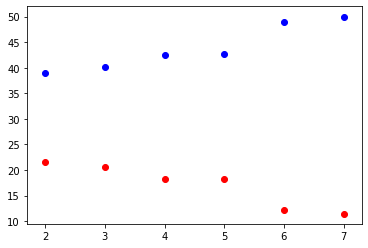

In [17]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

import matplotlib.pyplot as plt

plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse],
           c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var],
           c='blue')
plt.show()